# Final Project for CAP6307
## Cat Baker and Darshay Blount
### Fall 2020

In [2]:
# install modules
!pip install lyricsgenius
!pip install textblob
!python -m textblob.download_corpora

[nltk_data] Downloading package brown to /Users/catbaker3/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /Users/catbaker3/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/catbaker3/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/catbaker3/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to
[nltk_data]     /Users/catbaker3/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     /Users/catbaker3/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
Finished.


In [3]:
# import packages
from gensim.summarization import keywords
import spacy
import nltk
from nltk.corpus import stopwords
import pandas as pd
import lyricsgenius
import textblob
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# download spacy and import English
nltk.download('stopwords')
from spacy.lang.en import English

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/catbaker3/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
# Import stopwords
stopwords = set(stopwords.words('english'))

In [5]:
# Set the nlp language to English
nlp = English()
nlp.max_length = 10000000

In [6]:
# Set up the token, id, and secret for the Lyric Genius API
client_id = 'jGXOq14YmSS490yTKQ7CPzu8l7ui5v4JnbBvhIhQV8VV74cSTpoFEqoKo5NqRuTT'
client_secret = 'MCDsDPsZLCO10I9_cAOVZp91OAIFgx-aUDmaZ79hHQ9jgnquVkDROF1NBjlIisu9X2yG86OrGz7nJF26VB5nQw'
access_token = 'vcwFJvy8po5FLkEkeTeSbhkbfidq43zZqTxoBNLnEbL7tltCTbDRiVeLJ68AL2rG'

In [7]:
# Set up the API information
genius = lyricsgenius.Genius(access_token)

In [8]:
# Import the Billboard Top 100 dataset
billboard_100 = pd.read_csv('billboardHot100_1999-2019.csv')

In [9]:
# Preview the dataframe
billboard_100.head(10)

,Unnamed: 0,Artists,Name,Weekly.rank,Peak.position,Weeks.on.chart,Week,Date,Genre,Writing.Credits,Lyrics,Features
0,1,"Lil Nas,",Old Town Road,1,1.0,7.0,2019-07-06,"April 5, 2019","Country,Atlanta,Alternative Country,Hip-Hop,Tr...","Jozzy, Atticus ross, Trent reznor, Billy ray c...","Old Town Road Remix \nOh, oh-oh\nOh\nYeah, I'm...",Billy Ray Cyrus
1,2,"Shawn Mendes, Camila Cabello",Senorita,2,NaN,NaN,2019-07-06,"June 21, 2019",Pop,"Cashmere cat, Jack patterson, Charli xcx, Benn...",Senorita \nI love it when you call me senorita...,NaN
2,3,Billie Eilish,Bad Guy,3,2.0,13.0,2019-07-06,"March 29, 2019","Hip-Hop,Dark Pop,House,Trap,Memes,Alternative ...","Billie eilish, Finneas","bad guy \nWhite shirt now red, my bloody nose\...",NaN
3,4,Khalid,Talk,4,3.0,20.0,2019-07-06,"February 7, 2019","Synth-Pop,Pop","Howard lawrence, Guy lawrence, Khalid",Talk \nCan we just talk? Can we just talk?\nTa...,NaN
4,5,"Ed Sheeran, Justin Bieber",I Don't Care,5,2.0,7.0,2019-07-06,"May 10, 2019","Canada,UK,Dance,Dance-Pop,Pop","Ed sheeran, Justin bieber, Shellback, Max mart...",I Don't Care \nI'm at a party I don't wanna be...,NaN
5,6,Jonas Brothers,Sucker,6,1.0,17.0,2019-07-06,"March 1, 2019","Alternative Pop,Boy Band,Teen Pop,Pop-Rock,Pop","Ryan tedder, Louis bell, Frank dukes, Nick jon...",Sucker \nWe go together\nBetter than birds of ...,NaN
6,7,DaBaby,Suge,7,7.0,13.0,2019-07-06,"March 1, 2019","Trap,East Coast,Rap","Jetsonmade, Pooh beatz, Dababy","Suge \nPooh, you a fool for this one\nHa\nOh L...",NaN
7,8,Drake,Money In The Grave,8,7.0,2.0,2019-07-06,"June 15, 2019","Hip-Hop,Rap,Basketball,NBA,Canada","Asoteric, Ljay currie, Cydney christine, Rick ...","Money in the Grave \nYeah, okay\nLil CC on the...",Rick Ross
8,9,Chris Brown,No Guidance,9,9.0,3.0,2019-07-06,"June 8, 2019","Alternative R&;B,Hip-Hop,Rap,Pop,DMV,Canada,R&;B","Velous, J louis, Vinylz, Michee patrick lebrun...","No Guidance \nBefore I die I'm tryna fuck you,...",Drake
9,10,Post Malone,Wow.,10,2.0,27.0,2019-07-06,"December 24, 2018","Memes,Hip-Hop,Trap,Rap","Frank dukes, Billy walsh, Louis bell, Post malone","Wow \nSaid she tired of little money, need a b...",NaN


In [10]:
# Sort the dataframe by week ID (ascending)
billboard_100 = billboard_100.sort_values(by=['Week'])

In [11]:
billboard_100.head()

,Unnamed: 0,Artists,Name,Weekly.rank,Peak.position,Weeks.on.chart,Week,Date,Genre,Writing.Credits,Lyrics,Features
97224,97225,The Offspring,Why Don't You Get A Job?,100,74.0,15.0,1999-07-12,NaN,"Ska,Punk Rock,Rock",Dexter holland,Why Don't You Get a Job? \nMy friend's got a g...,NaN
97157,97158,Sugar Ray,Every Morning,27,3.0,28.0,1999-07-12,NaN,Rock,"David kahne, Sugar ray",Every Morning \nEvery morning there's a halo h...,NaN
97158,97159,Goo Goo Dolls,Slide,28,8.0,33.0,1999-07-12,NaN,"Alternative Rock,Rock",John rzeznik,Slide \nCould you whisper in my ear?\nThe thin...,NaN
97159,97160,Lonestar,Amazed,29,29.0,7.0,1999-07-12,NaN,"Pop,Country","Marv green, Chris lindsey, Aimee mayo",Amazed \nEvery time our eyes meet\nThis feelin...,NaN
97160,97161,Tim McGraw,Please Remember Me,30,10.0,16.0,1999-07-12,NaN,"Country,Rock","Will jennings, Rodney crowell",Please Remember Me \nWhen all our tears have r...,NaN


In [12]:
# Check for null values
billboard_100.isnull().sum()

# This makes since bc the null values belong to the song's first week on the Billboard chart

Unnamed: 0             0
Artists                0
Name                   0
Weekly.rank            0
Peak.position       7069
Weeks.on.chart      7069
Week                   0
Date               12247
Genre                  0
Writing.Credits     7213
Lyrics                 0
Features           75936
dtype: int64

In [13]:
# Filter to only show songs from the last ten years (November 2010-Dec 2019 (end of dataset))
billboard_100 = billboard_100.loc[billboard_100['Week'] > '2009-07-01']

In [14]:
billboard_100.head()

,Unnamed: 0,Artists,Name,Weekly.rank,Peak.position,Weeks.on.chart,Week,Date,Genre,Writing.Credits,Lyrics,Features
49402,49403,Dierks Bentley,Sideways,35,35.0,12.0,2009-07-02,"February 3, 2009",Country,"Dierks bentley, Jim beavers","Sideways \nHey girl, what's your name?\nIt's s...",NaN
49401,49402,Flo Rida,Sugar,34,5.0,14.0,2009-07-02,"March 31, 2009",Rap,"Steven battey, Carlos battey, Dj montay, Flo r...",Sugar \nDumm\nDouble dee double di\nDouble dee...,Wynter
49400,49401,Jason Mraz,I'm Yours,33,6.0,62.0,2009-07-02,"April 15, 2008","Adult Contemporary,Adult Alternative,Pop-Rock,...",Jason mraz,I'm Yours \nWell you done done me and you bet ...,NaN
49395,49396,Brad Paisley,Then,28,28.0,14.0,2009-07-02,"March 23, 2009",Country,"Ashley gorley, Brad paisley, Chris dubois",Then \nI remember trying not to stare\nThe nig...,NaN
49398,49399,Jordin Sparks,Battlefield,31,31.0,6.0,2009-07-02,"May 8, 2009","R&;B,Pop","Wayne wilkins, Sam watters, Louis biancaniello...","Battlefield \nDon't try to explain your mind, ...",NaN


In [15]:
billboard_100.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49463 entries, 49402 to 0
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       49463 non-null  int64  
 1   Artists          49463 non-null  object 
 2   Name             49463 non-null  object 
 3   Weekly.rank      49463 non-null  int64  
 4   Peak.position    45402 non-null  float64
 5   Weeks.on.chart   45402 non-null  float64
 6   Week             49463 non-null  object 
 7   Date             47597 non-null  object 
 8   Genre            49463 non-null  object 
 9   Writing.Credits  47974 non-null  object 
 10  Lyrics           49463 non-null  object 
 11  Features         12949 non-null  object 
dtypes: float64(2), int64(2), object(8)
memory usage: 4.9+ MB


In [29]:
# Create a unique identifier column 



<ipython-input-29-0418d80991d7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  billboard_100['Artist_Song'] = str(billboard_100['Artists'] + billboard_100['Name'])


In [17]:
billboard_100.shape

(49463, 12)

## Exploratory Data Analysis

In [18]:
# Distribution of weeks on the Billboard chart
max_weeks = billboard_100.groupby('Name')['Weeks.on.chart'].max().reset_index()
max_weeks['Weeks.on.chart'].value_counts()

20.0    564
2.0     287
3.0     169
4.0     107
18.0    106
       ... 
76.0      1
79.0      1
60.0      1
65.0      1
87.0      1
Name: Weeks.on.chart, Length: 65, dtype: int64

Text(0, 0.5, 'Number of Songs')

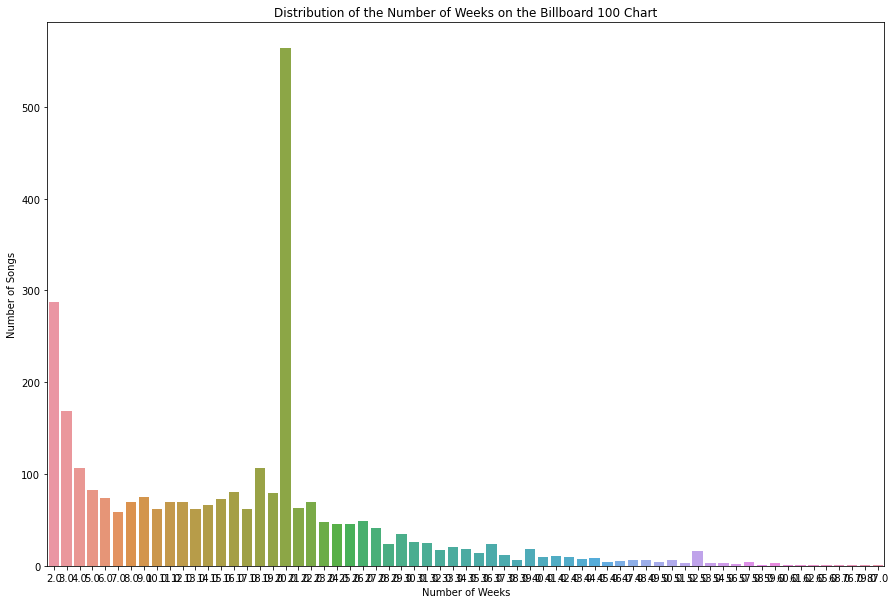

In [19]:
# Plot the distribution
plt.figure(figsize=(15,10))
sns.countplot(max_weeks['Weeks.on.chart'])
plt.title('Distribution of the Number of Weeks on the Billboard 100 Chart')
plt.xlabel('Number of Weeks')
plt.ylabel('Number of Songs')

In [20]:
# Look at the songs with the longest time on the charts
max_weeks.loc[max_weeks['Weeks.on.chart'] >= 55].sort_values(by = 'Weeks.on.chart', ascending=False)

,Name,Weeks.on.chart
2680,Radioactive,87.0
2838,Sail,79.0
1662,I'm Yours,76.0
703,Counting Stars,68.0
2791,Rolling In The Deep,65.0
1437,Ho Hey,62.0
792,Demons,61.0
2283,Need You Now,60.0
144,All Of Me,59.0
3026,Somebody That I Used To Know,59.0


In [21]:
peak_position = billboard_100.groupby('Name')['Peak.position'].max().reset_index()
peak_position['Peak.position'].value_counts()

91.0     87
88.0     75
90.0     71
87.0     66
84.0     64
         ..
29.0     11
49.0     11
32.0     10
40.0      9
100.0     9
Name: Peak.position, Length: 100, dtype: int64

## Lyrics and Sentiment Analysis

In [23]:
# Get the column names 
billboard_100.columns.tolist()

['Unnamed: 0',
 'Artists',
 'Name',
 'Weekly.rank',
 'Peak.position',
 'Weeks.on.chart',
 'Week',
 'Date',
 'Genre',
 'Writing.Credits',
 'Lyrics',
 'Features']

In [24]:
# Function to return the sentiment score for each song
def lyrics_sentiment(lyrics):    
    analysis = TextBlob(lyrics)
    return analysis.sentiment.polarity

In [25]:
# Text preprocessing
def preprocessing(text):
    document = nlp(text, disable=['ner','parser'])
    lemmas = [token.lemma_ for token in document]
    lemma_clean = [lemma for lemma in lemmas
                  if lemma.isalpha() and lemma not in stopwords]
    return ''.join(lemma_clean)

In [26]:
#Use get_lyric_sentiment to get sentiment score for all the song lyrics
sentiment = billboard_100.apply(lambda row: lyrics_sentiment(row['Lyrics']), axis =1)
billboard_100['Sentiment'] = sentiment

In [27]:
# Set the index to be the weekid
billboard_100.reset_index(inplace=True)

In [28]:
#Set the index of the dataframe to the WeekID. This sets us up to resample dataframe based on time
billboard_100['Week'] = pd.to_datetime(billboard_100['Week'],infer_datetime_format=True)
billboard_100 = billboard_100.sort_values(by='Week')
billboard_100 = billboard_100.reset_index(drop=True)
billboard_100 = billboard_100.set_index('Week')

In [ ]:
#Resample dataframe lyrics by year. Get all the lyrics for every song for each year
#lyrics_resample = billboard_100['Lyrics'].resample('y').sum()

In [103]:
#Resample dataframe sentiment column by year. This arranges the mean lyric sentiment for every year
billboard_100_resample = billboard_100['Sentiment'].resample('Y').mean()

Text(0, 0.5, 'Sentiment')

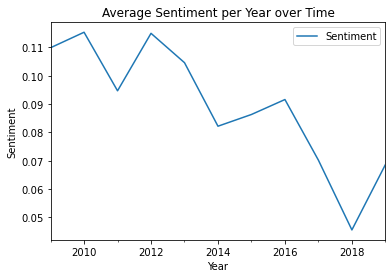

In [104]:
#Plot lyric sentiment over time
billboard_100_resample.plot(label='Sentiment', legend=True)
plt.title('Average Sentiment per Year over Time')
plt.xlabel('Year')
plt.ylabel('Sentiment')

In [105]:
billboard_100_resample = billboard_100['Sentiment'].resample('W').mean()

Text(0, 0.5, 'Sentiment')

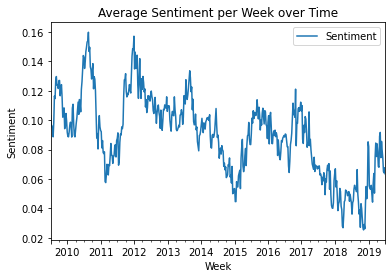

In [106]:
#Plot lyric sentiment over time
billboard_100_resample.plot(label='Sentiment', legend=True)
plt.title('Average Sentiment per Week over Time')
plt.xlabel('Week')
plt.ylabel('Sentiment')

## Text Analysis

In [109]:
# Change all to lowercase and remove all punctuation
def clean_text(x):
    punc='!"'',.@#$%^&*()-_+:;?><[]{}`~1234567890'
    lowercase = x.lower()
    for ch in punc:
        lowercase = lowercase.replace(ch,'')
    return lowercase


In [110]:
# Keyword extraction
def keyword_extract(texts):
    xkeywords = []
    values = keywords(text=preprocessing(texts), split='\n', scores=True)
    for x in values[:10]:
        xkeywords.append(x[0])
    try:
        return xkeywords
    except:
        return 'there is no content'

In [ ]:
lyrics_resample = billboard_100['Lyrics'].resample('Y').sum()

In [111]:
#Use return_keywords function on lyrics_resample to get the top 20 keywords for each year
lyric_keywords = [keyword_extract(x[1]) for x in lyrics_resample.iteritems()]


TypeError: Argument 'string' has incorrect type (expected str, got Series)

In [47]:
# Compute the lexical richness of each song

def lexical_richness(text):
    return len(set(text))/len(text)

texts = billboard_100['Lyrics']  #Will this line work??

lexicalrichness = [lexical_richness(text) for text in texts]

billboard_100['lexicalrichness'] = lexicalrichness

billboard_100.sort_values(by='lexical_richness', ascending=False)

In [52]:
# Tokens of each song
tokens = [len(text) for text in texts]

billboard_100['tokens'] = tokens

In [53]:
# Types of each song 
types = [len(set(text)) for text in texts]

billboard_100['types'] = types

In [86]:
billboard_100['tokens'] = billboard_100['tokens'].apply(lambda x: float(x))
billboard_100['types'] = billboard_100['types'].apply(lambda x: float(x))

In [90]:
# Type-to-token ratio
ttr = billboard_100['types']/billboard_100['tokens']

billboard_100['TTR'] = ttr

In [91]:
billboard_100.head()

,index,Unnamed: 0,Artists,Name,Weekly.rank,Peak.position,Weeks.on.chart,Date,Genre,Writing.Credits,Lyrics,Features,Sentiment,lexicalrichness,tokens,types,TTR
Week,,,,,,,,,,,,,,,,,
2009-07-02,49402,49403,Dierks Bentley,Sideways,35,35.0,12.0,"February 3, 2009",Country,"Dierks bentley, Jim beavers","Sideways \nHey girl, what's your name?\nIt's s...",NaN,0.050198,0.036220,1270.0,46.0,0.036220
2009-07-02,49442,49443,Montgomery Gentry,One In Every Crowd,79,53.0,15.0,NaN,Country,NaN,"One In Every Crowd \nGolden Tee, shuffleboard,...",NaN,0.180540,0.023796,1723.0,41.0,0.023796
2009-07-02,49416,49417,T.I.,Dead And Gone,50,2.0,29.0,"September 29, 2008",Rap,"Ti, Justin timberlake, Rob knox","Dead and Gone \nAyy, let me kick it to you rig...",Justin Timberlake,-0.055585,0.012891,4189.0,54.0,0.012891
2009-07-02,49462,49463,David Guetta,When Love Takes Over,100,NaN,NaN,"April 21, 2009","Dance,Electro-Pop,Pop","Frederic riesterer, Miriam nervo, Olivia nervo...",When Love Takes Over \nIt's complicated\nIt al...,Kelly Rowland,0.416883,0.032748,1252.0,41.0,0.032748
2009-07-02,49461,49462,Cage The Elephant,Ain't No Rest For The Wicked,99,92.0,3.0,"June 16, 2008","Adult Alternative,Alternative Rock,Indie Rock,...","Daniel tichenor, Matt shultz, Brad shultz, Lin...",Ain't No Rest for the Wicked \nI was walking d...,NaN,0.092048,0.020973,2241.0,47.0,0.020973


In [94]:
billboard_100_resample = billboard_100['TTR'].resample('W').mean()

Text(0, 0.5, 'Sentiment')

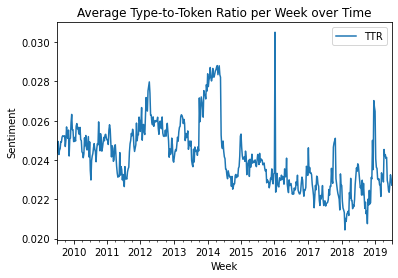

In [95]:
#Plot lyric sentiment over time
billboard_100_resample.plot(label='TTR', legend=True)
plt.title('Average Type-to-Token Ratio per Week over Time')
plt.xlabel('Week')
plt.ylabel('Sentiment')

In [ ]:
#Compute the word count of each song and create a word count column
#then plot the word count dist



